In [50]:
import string
import numpy
import pandas

def only_alpha(str):
    input_char = ""
    for char in str:
        if char.isalpha():
            input_char += char
    return input_char

def permutation(str,n,dict):
    for i in range(len(only_alpha(str))-1):
        if only_alpha(str)[i:i+2] not in dict:
            dict[only_alpha(str)[i:i+2]] = n
            continue
        dict[only_alpha(str)[i:i+2]] += n

In [51]:
count = {}
# Starters
permutation("D → G → D → J → D → J → L → S → T → D → N → D", 325, count)
permutation("D → E → D ", 175, count)
permutation("D → E → V → D → R → E → D", 225, count)
permutation("D → V → D → K → P → L → D", 200, count)
#permutation("D → E → E → T → D → S/O/M → D", 325, count)
permutation("D → E → T → D → S → D", 100, count)
permutation("D → E → T → D → O → D", 100, count)
permutation("D → E → T → D → M → D", 125, count)

permutation("D → T → F → R → C → D", 120, count)
permutation("D → V → D → G → P → N → D", 70, count)
permutation("D → G → D → I → L → G → D", 120, count)
permutation("D → C → H → C → P → Q → C → O → D", 100, count)
permutation("D → P → A → B → T → Q → P → D", 100, count)

In [52]:
uplt = string.ascii_uppercase[:20] + string.ascii_uppercase[21:23]

count_matrix = numpy.zeros((22,22))
tf_matrix = numpy.zeros((22,22))

for letter1 in uplt:
    for letter2 in uplt:
        if letter1+letter2 in count.keys():
            count_matrix[uplt.index(letter1)][uplt.index(letter2)] += count[letter1+letter2]
            tf_matrix[uplt.index(letter1)][uplt.index(letter2)] = 1
        if letter2+letter1 in count.keys():
            count_matrix[uplt.index(letter1)][uplt.index(letter2)] += count[letter2+letter1]
            tf_matrix[uplt.index(letter1)][uplt.index(letter2)] = 1
count_matrix

count_matrix_0_1 = count_matrix/count_matrix.max()

# Degree
# 0.2 and 0.4 ... are not actual numbers, just for convenience
count_matrix_degree = pandas.cut(count_matrix_0_1.flatten(), bins=4, labels=[0.2,0.4,0.6,0.8])
count_matrix_degree_matrix = numpy.asarray(count_matrix_degree).reshape((22,22)).tolist()

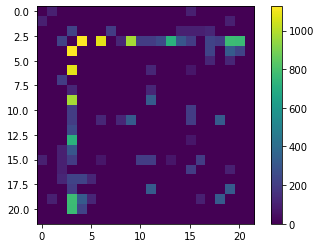

In [53]:
import matplotlib.pyplot as plt
plt.imshow(count_matrix)
plt.colorbar()
plt.show()

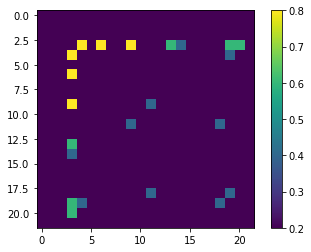

In [54]:
plt.imshow(count_matrix_degree_matrix)
plt.colorbar()
plt.show()

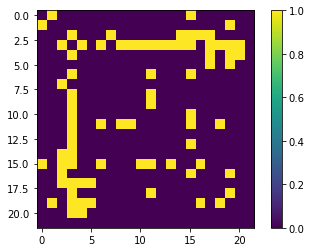

In [55]:
plt.imshow(tf_matrix)
plt.colorbar()
plt.show()

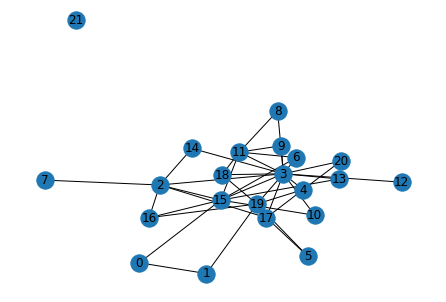

In [56]:
import networkx as nx
G = nx.from_numpy_matrix(count_matrix_0_1)
nx.draw(G, with_labels=True)